In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [2]:
house_data = pd.read_csv("Raw Data/clean_house_data_ML.csv",low_memory = False)
price_data = pd.read_csv('Raw Data/price.csv', low_memory = False)
price_df = pd.DataFrame(price_data)
imp_df = pd.DataFrame(house_data)
imp_df

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,PRIME,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,INDEX_BIN
0,3,1,8,4,2011.0,2.0,1,1627,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,41
1,3,1,7,3,2018.0,2.0,1,1424,20009.0,2,5.125000,0.0,1.0,0.0,1.0,0.0,0.0,57
2,3,1,5,3,2011.0,2.0,1,1815,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,52
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,49
4,3,1,9,3,2001.0,2.0,1,1424,20009.0,2,6.772727,0.0,1.0,0.0,1.0,0.0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46129,2,0,10,4,2004.0,2.0,0,5837,20032.0,8,4.750000,1.0,0.0,0.0,0.0,0.0,1.0,3
46130,2,0,10,4,2016.0,2.0,0,5302,20032.0,8,3.750000,0.0,1.0,0.0,0.0,0.0,1.0,7
46131,2,0,10,5,2012.0,2.0,0,5348,20032.0,8,3.250000,1.0,0.0,0.0,0.0,0.0,1.0,3
46132,2,0,10,4,2017.0,2.0,0,3046,20032.0,8,4.250000,1.0,0.0,0.0,0.0,0.0,1.0,8


In [3]:
imp_df = pd.merge(imp_df, price_df, left_index=True, right_index=True)
imp_df.head()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,PRIME,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,INDEX_BIN,PRICE
0,3,1,8,4,2011.0,2.0,1,1627,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,41,1095000.0
1,3,1,7,3,2018.0,2.0,1,1424,20009.0,2,5.125000,0.0,1.0,0.0,1.0,0.0,0.0,57,1050000.0
2,3,1,5,3,2011.0,2.0,1,1815,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,52,1430000.0
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,49,1325000.0
4,3,1,9,3,2001.0,2.0,1,1424,20009.0,2,6.772727,0.0,1.0,0.0,1.0,0.0,0.0,23,1240000.0


In [21]:
index = imp_df[imp_df.PRICE >= 1500000].index
index2 = imp_df[imp_df.PRICE <= 25000].index
imp_df = imp_df.drop(index)
imp_df = imp_df.drop(index2)

In [4]:
index = imp_df[imp_df.ROOMS > 11].index
index2 = imp_df[imp_df.ROOMS < 3].index
imp_df = imp_df.drop(index)
imp_df = imp_df.drop(index2)


In [5]:
index = imp_df[imp_df.HF_BATHRM > 2].index
imp_df = imp_df.drop(index)


In [6]:
index = imp_df[imp_df.BATHRM > 3].index
index2 = imp_df[imp_df.BATHRM <1].index
imp_df = imp_df.drop(index)
imp_df = imp_df.drop(index2)


In [7]:
index = imp_df[imp_df.FIREPLACES > 2].index
imp_df = imp_df.drop(index)


In [8]:
index = imp_df[imp_df.KITCHENS > 1].index
index2 = imp_df[imp_df.KITCHENS < 1].index
imp_df = imp_df.drop(index)
imp_df = imp_df.drop(index2)

In [9]:
index = imp_df[imp_df.BEDRM > 5].index
index2 = imp_df[imp_df.BEDRM < 2].index
imp_df = imp_df.drop(index)
imp_df = imp_df.drop(index2)


C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


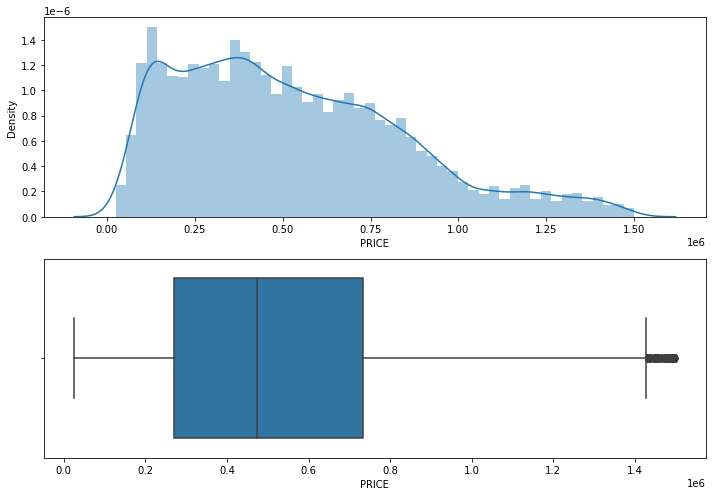

In [10]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.PRICE)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.PRICE)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


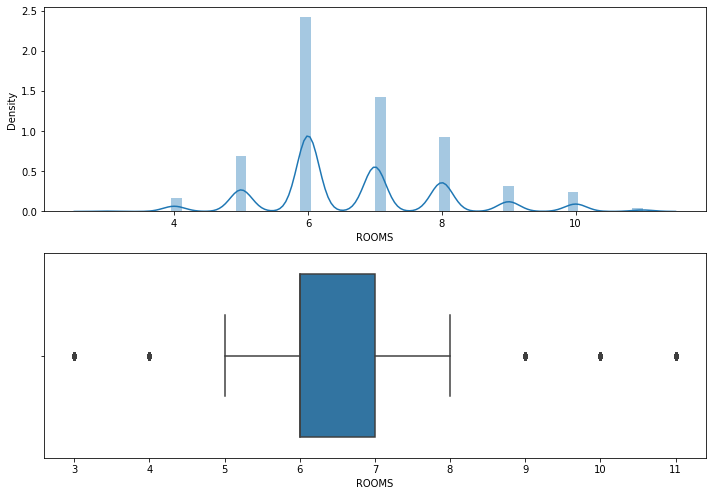

In [11]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.ROOMS)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.ROOMS)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


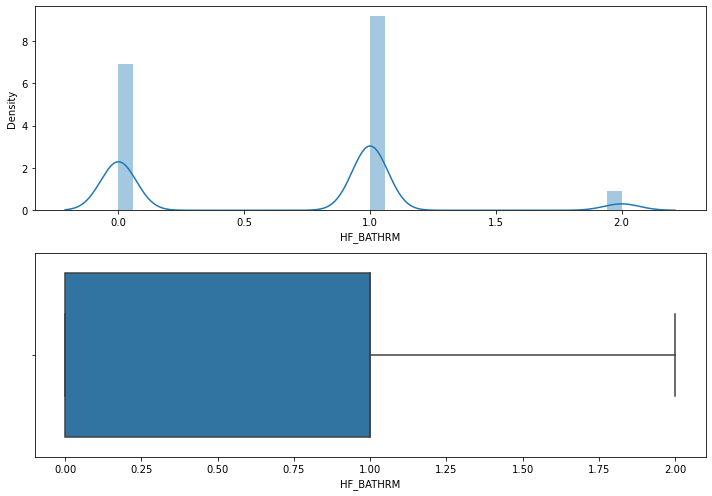

In [12]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.HF_BATHRM)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.HF_BATHRM)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


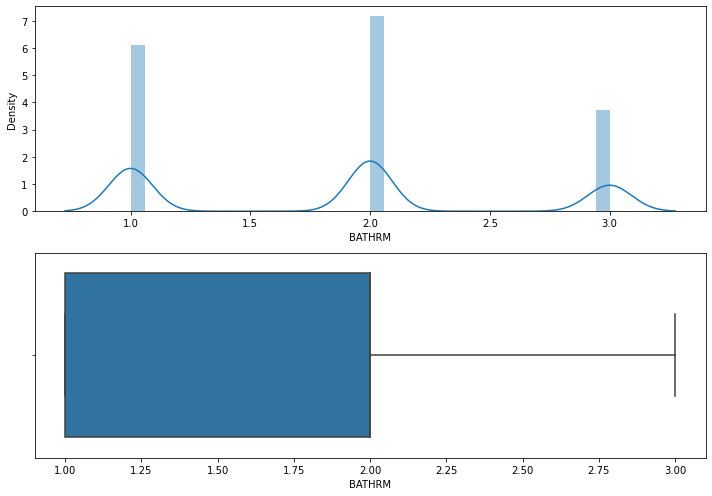

In [13]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.BATHRM)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.BATHRM)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


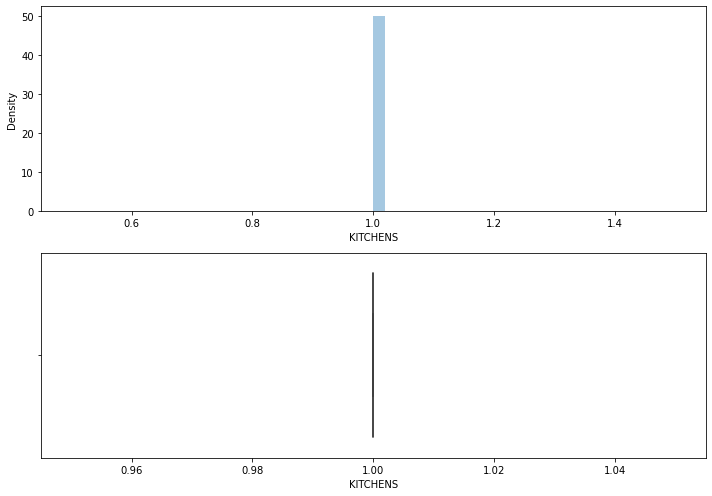

In [14]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.KITCHENS)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.KITCHENS)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


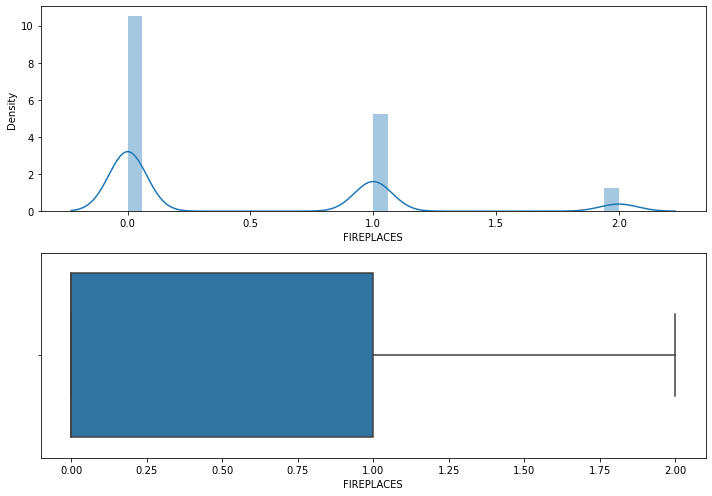

In [15]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.FIREPLACES)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.FIREPLACES)
plt.tight_layout()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


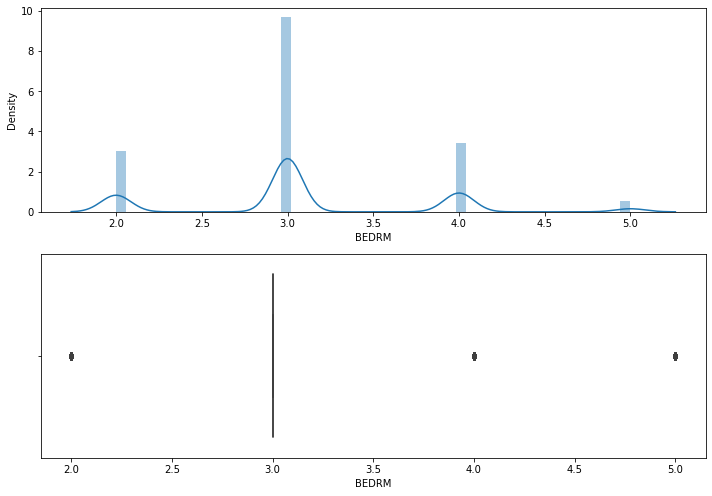

In [16]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.BEDRM)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.BEDRM)
plt.tight_layout()

In [17]:
imp_cat = imp_df.dtypes[imp_df.dtypes == "object"].index.tolist()


In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(imp_df[imp_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(imp_cat)
encode_df.head()

C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""
0
1
2
3
4


In [22]:
#Binning Price data
bins = [25000, 50000, 75000,100000, 125000, 150000, 175000, 200000, 225000,250000,
        275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,
        525000,550000,575000,600000,625000,650000,675000,700000,725000,750000,
        775000, 800000,825000,850000,875000,900000,925000,950000,975000,1000000,
        1025000,1050000,1075000,1100000,1125000,1150000,1175000,1200000,1225000,1250000,
        1275000,1300000,1325000,1350000,1375000,1400000,1425000, 1450000,1475000,1500000]
labels = [x*1 for x in range(1,60)]
cut = pd.cut(imp_df['PRICE'], bins=bins, labels=labels)
cut_df = pd.DataFrame(cut)
cut_df['REAL_PRICE'] = imp_df.PRICE
cut_df = cut_df.rename(columns={'PRICE':'INDEX_BIN'})
cut_df.head(50)

,INDEX_BIN,REAL_PRICE
3,52,1325000.0
6,1,33232.0
7,36,907400.0
8,42,1065000.0
23,8,216000.0
29,39,990000.0
30,27,682500.0
31,39,993500.0
32,29,745000.0
34,11,277000.0


In [23]:
imp_df = pd.merge(imp_df, cut_df, left_index=True, right_index=True)
imp_df.head()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,...,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,INDEX_BIN_x,PRICE,INDEX_BIN_y,REAL_PRICE
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,49,1325000.0,52,1325000.0
6,1,0,6,3,2006.0,1.0,0,2090,20009.0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,36,33232.0,1,33232.0
7,2,1,5,3,2012.0,1.0,1,2090,20009.0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,42,907400.0,36,907400.0
8,2,1,8,3,2012.0,1.0,2,2090,20009.0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,43,1065000.0,42,1065000.0
23,2,1,7,2,2009.0,1.0,1,838,20009.0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,29,216000.0,8,216000.0


In [24]:
imp_df = imp_df.drop(columns = ['REAL_PRICE','INDEX_BIN_x'])

In [30]:
imp_df = imp_df.rename(columns = {'INDEX_BIN_y': 'INDEX_BIN'})

In [31]:
imp_df = imp_df.astype({'INDEX_BIN': 'int32'})

In [32]:
imp_df

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,PRIME,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,PRICE,INDEX_BIN
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,1325000.0,52
6,1,0,6,3,2006.0,1.0,0,2090,20009.0,2,7.875000,0.0,1.0,0.0,1.0,0.0,0.0,33232.0,1
7,2,1,5,3,2012.0,1.0,1,2090,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,907400.0,36
8,2,1,8,3,2012.0,1.0,2,2090,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,1065000.0,42
23,2,1,7,2,2009.0,1.0,1,838,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,216000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46124,2,1,7,3,2008.0,1.0,1,1734,20032.0,8,4.928571,0.0,1.0,0.0,0.0,1.0,0.0,235000.0,9
46125,1,1,9,3,2001.0,1.0,0,2799,20032.0,8,6.772727,0.0,1.0,0.0,0.0,1.0,0.0,220000.0,8
46126,1,1,7,3,2013.0,1.0,0,2359,20032.0,8,3.250000,0.0,1.0,0.0,0.0,1.0,0.0,65000.0,2
46127,1,1,7,3,2012.0,1.0,0,1919,20032.0,8,3.250000,0.0,1.0,0.0,0.0,1.0,0.0,149000.0,5


In [33]:
imp_df.to_csv('clean_house_data_ML.csv', index=False)